## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.153159  1.644195  0.264009  0.965362  1.695163  0.763698
1  1.321033  0.065356 -0.352862  0.623113 -0.046311  1.098696
2 -0.127302 -1.152028  0.656563  1.113469  1.483839  0.334761
3  1.473400  0.870595 -1.700196 -0.263309  1.711093  1.670460
4 -0.734351  0.749519  1.572762  1.367480  0.215956  1.609453


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9696738	total: 57.5ms	remaining: 57.4s
1:	learn: 0.9621471	total: 58.1ms	remaining: 29s
2:	learn: 0.9541894	total: 58.7ms	remaining: 19.5s
3:	learn: 0.9439798	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9373105	total: 60ms	remaining: 11.9s
5:	learn: 0.9277594	total: 60.5ms	remaining: 10s
6:	learn: 0.9178263	total: 61ms	remaining: 8.65s
7:	learn: 0.9100535	total: 61.5ms	remaining: 7.63s
8:	learn: 0.9027112	total: 62ms	remaining: 6.83s
9:	learn: 0.8935168	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8866500	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8777160	total: 63.6ms	remaining: 5.24s
12:	learn: 0.8685337	total: 64ms	remaining: 4.86s
13:	learn: 0.8618709	total: 64.5ms	remaining: 4.54s
14:	learn: 0.8550861	total: 64.9ms	remaining: 4.26s
15:	learn: 0.8479554	total: 65.4ms	remaining: 4.02s
16:	learn: 0.8420537	total: 65.8ms	remaining: 3.81s
17:	learn: 0.8342208	total: 66.3ms	remaining: 3.61s
18:	learn: 0.8281636	total: 66.6ms	remaining: 3.44s
19:	l

104:	learn: 0.4137819	total: 107ms	remaining: 912ms
105:	learn: 0.4114936	total: 108ms	remaining: 908ms
106:	learn: 0.4078218	total: 108ms	remaining: 902ms
107:	learn: 0.4046617	total: 108ms	remaining: 896ms
108:	learn: 0.4019379	total: 109ms	remaining: 890ms
109:	learn: 0.3986921	total: 109ms	remaining: 884ms
110:	learn: 0.3956056	total: 110ms	remaining: 878ms
111:	learn: 0.3928394	total: 110ms	remaining: 873ms
112:	learn: 0.3898863	total: 110ms	remaining: 867ms
113:	learn: 0.3874724	total: 111ms	remaining: 863ms
114:	learn: 0.3840025	total: 112ms	remaining: 859ms
115:	learn: 0.3811562	total: 112ms	remaining: 854ms
116:	learn: 0.3777022	total: 112ms	remaining: 849ms
117:	learn: 0.3749920	total: 113ms	remaining: 845ms
118:	learn: 0.3728712	total: 114ms	remaining: 842ms
119:	learn: 0.3701337	total: 114ms	remaining: 837ms
120:	learn: 0.3677917	total: 115ms	remaining: 833ms
121:	learn: 0.3651941	total: 115ms	remaining: 828ms
122:	learn: 0.3627046	total: 116ms	remaining: 824ms
123:	learn: 

263:	learn: 0.1309893	total: 187ms	remaining: 521ms
264:	learn: 0.1299049	total: 187ms	remaining: 520ms
265:	learn: 0.1290391	total: 188ms	remaining: 519ms
266:	learn: 0.1280623	total: 188ms	remaining: 517ms
267:	learn: 0.1271573	total: 189ms	remaining: 516ms
268:	learn: 0.1263328	total: 189ms	remaining: 515ms
269:	learn: 0.1254040	total: 190ms	remaining: 513ms
270:	learn: 0.1244248	total: 190ms	remaining: 512ms
271:	learn: 0.1234882	total: 191ms	remaining: 511ms
272:	learn: 0.1224343	total: 191ms	remaining: 509ms
273:	learn: 0.1214272	total: 192ms	remaining: 508ms
274:	learn: 0.1205975	total: 192ms	remaining: 507ms
275:	learn: 0.1197950	total: 193ms	remaining: 506ms
276:	learn: 0.1189335	total: 194ms	remaining: 505ms
277:	learn: 0.1181106	total: 194ms	remaining: 504ms
278:	learn: 0.1173402	total: 195ms	remaining: 503ms
279:	learn: 0.1165358	total: 195ms	remaining: 502ms
280:	learn: 0.1156836	total: 196ms	remaining: 500ms
281:	learn: 0.1148641	total: 196ms	remaining: 499ms
282:	learn: 

464:	learn: 0.0413358	total: 290ms	remaining: 334ms
465:	learn: 0.0411996	total: 291ms	remaining: 333ms
466:	learn: 0.0410665	total: 291ms	remaining: 333ms
467:	learn: 0.0409056	total: 292ms	remaining: 332ms
468:	learn: 0.0407925	total: 292ms	remaining: 331ms
469:	learn: 0.0405917	total: 293ms	remaining: 330ms
470:	learn: 0.0404890	total: 294ms	remaining: 330ms
471:	learn: 0.0402931	total: 294ms	remaining: 329ms
472:	learn: 0.0400566	total: 294ms	remaining: 328ms
473:	learn: 0.0399297	total: 295ms	remaining: 327ms
474:	learn: 0.0397761	total: 295ms	remaining: 326ms
475:	learn: 0.0396337	total: 296ms	remaining: 326ms
476:	learn: 0.0394677	total: 296ms	remaining: 325ms
477:	learn: 0.0393445	total: 297ms	remaining: 324ms
478:	learn: 0.0392079	total: 297ms	remaining: 323ms
479:	learn: 0.0390475	total: 298ms	remaining: 322ms
480:	learn: 0.0389627	total: 298ms	remaining: 322ms
481:	learn: 0.0388790	total: 298ms	remaining: 321ms
482:	learn: 0.0386841	total: 299ms	remaining: 320ms
483:	learn: 

626:	learn: 0.0216360	total: 370ms	remaining: 220ms
627:	learn: 0.0216022	total: 371ms	remaining: 220ms
628:	learn: 0.0215692	total: 371ms	remaining: 219ms
629:	learn: 0.0215025	total: 372ms	remaining: 218ms
630:	learn: 0.0214706	total: 372ms	remaining: 218ms
631:	learn: 0.0214396	total: 373ms	remaining: 217ms
632:	learn: 0.0214093	total: 373ms	remaining: 216ms
633:	learn: 0.0213415	total: 374ms	remaining: 216ms
634:	learn: 0.0213121	total: 374ms	remaining: 215ms
635:	learn: 0.0212443	total: 374ms	remaining: 214ms
636:	learn: 0.0211370	total: 375ms	remaining: 214ms
637:	learn: 0.0211114	total: 375ms	remaining: 213ms
638:	learn: 0.0210066	total: 376ms	remaining: 212ms
639:	learn: 0.0209816	total: 376ms	remaining: 212ms
640:	learn: 0.0208792	total: 376ms	remaining: 211ms
641:	learn: 0.0208514	total: 377ms	remaining: 210ms
642:	learn: 0.0208240	total: 377ms	remaining: 209ms
643:	learn: 0.0207628	total: 378ms	remaining: 209ms
644:	learn: 0.0207038	total: 378ms	remaining: 208ms
645:	learn: 

832:	learn: 0.0101399	total: 474ms	remaining: 94.9ms
833:	learn: 0.0101006	total: 474ms	remaining: 94.4ms
834:	learn: 0.0100617	total: 475ms	remaining: 93.8ms
835:	learn: 0.0100377	total: 475ms	remaining: 93.2ms
836:	learn: 0.0099986	total: 475ms	remaining: 92.6ms
837:	learn: 0.0099713	total: 476ms	remaining: 92ms
838:	learn: 0.0099292	total: 476ms	remaining: 91.4ms
839:	learn: 0.0098920	total: 477ms	remaining: 90.8ms
840:	learn: 0.0098454	total: 477ms	remaining: 90.2ms
841:	learn: 0.0098079	total: 478ms	remaining: 89.7ms
842:	learn: 0.0097782	total: 479ms	remaining: 89.2ms
843:	learn: 0.0097351	total: 480ms	remaining: 88.7ms
844:	learn: 0.0097090	total: 481ms	remaining: 88.1ms
845:	learn: 0.0096777	total: 481ms	remaining: 87.5ms
846:	learn: 0.0096471	total: 481ms	remaining: 86.9ms
847:	learn: 0.0096185	total: 482ms	remaining: 86.3ms
848:	learn: 0.0095890	total: 482ms	remaining: 85.8ms
849:	learn: 0.0095605	total: 483ms	remaining: 85.1ms
850:	learn: 0.0095153	total: 483ms	remaining: 84

958:	learn: 0.0063673	total: 538ms	remaining: 23ms
959:	learn: 0.0063367	total: 539ms	remaining: 22.4ms
960:	learn: 0.0063106	total: 539ms	remaining: 21.9ms
961:	learn: 0.0062835	total: 540ms	remaining: 21.3ms
962:	learn: 0.0062557	total: 540ms	remaining: 20.8ms
963:	learn: 0.0062260	total: 541ms	remaining: 20.2ms
964:	learn: 0.0062010	total: 541ms	remaining: 19.6ms
965:	learn: 0.0061750	total: 541ms	remaining: 19.1ms
966:	learn: 0.0061379	total: 542ms	remaining: 18.5ms
967:	learn: 0.0061086	total: 542ms	remaining: 17.9ms
968:	learn: 0.0060820	total: 543ms	remaining: 17.4ms
969:	learn: 0.0060627	total: 543ms	remaining: 16.8ms
970:	learn: 0.0060391	total: 544ms	remaining: 16.2ms
971:	learn: 0.0060135	total: 544ms	remaining: 15.7ms
972:	learn: 0.0059885	total: 545ms	remaining: 15.1ms
973:	learn: 0.0059701	total: 545ms	remaining: 14.5ms
974:	learn: 0.0059490	total: 545ms	remaining: 14ms
975:	learn: 0.0059283	total: 546ms	remaining: 13.4ms
976:	learn: 0.0058991	total: 546ms	remaining: 12.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

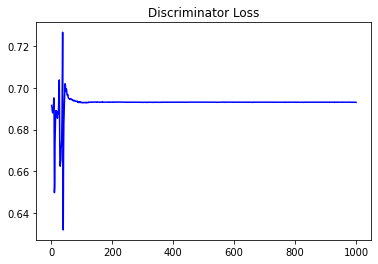

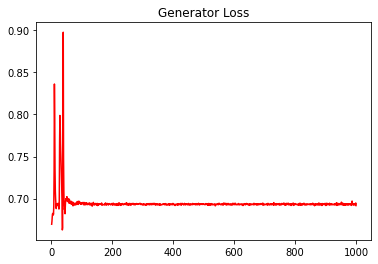

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1184699040567043


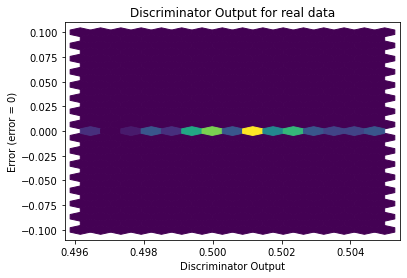

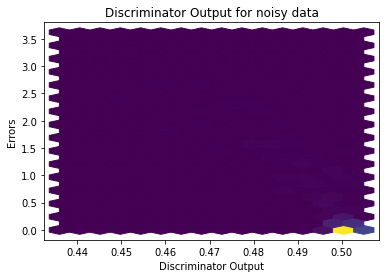

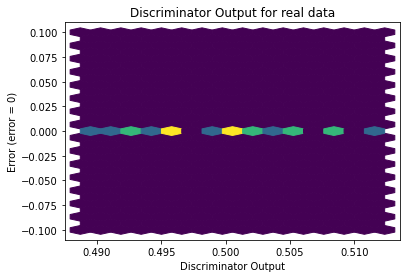

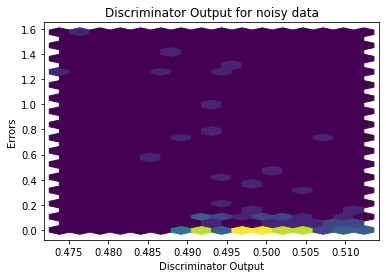

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


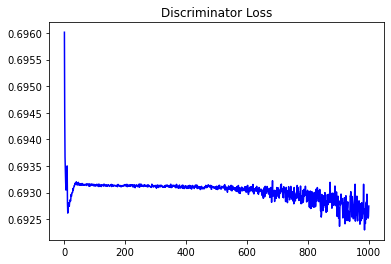

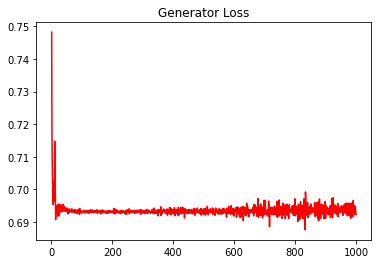

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17286649948633734


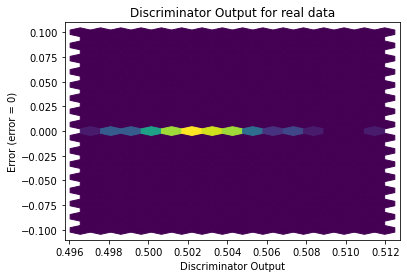

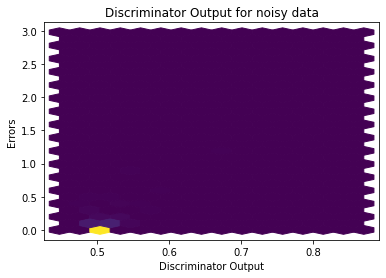

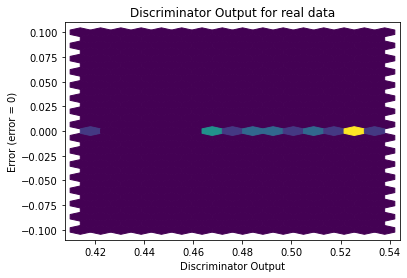

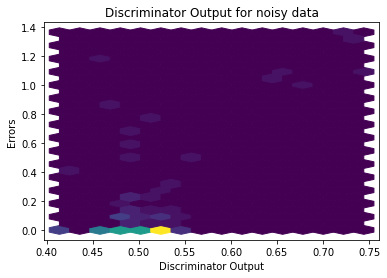

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
